In [2]:
import pandas as pd

# 파일을 로드합니다.
file_path = 'C:/Users/82106/Desktop/데이터분석 프로젝트/개인 프로젝트 1/data/open/preprocessed_sales_df.csv'
sales_df = pd.read_csv(file_path)

# 데이터의 첫 몇 줄과 기본 정보를 확인합니다.
sales_df_info = sales_df.info()
sales_df_head = sales_df.head()

sales_df_info, sales_df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15890 entries, 0 to 15889
Columns: 460 entries, ID to 2023-04-04
dtypes: float64(459), int64(1)
memory usage: 55.8 MB


(None,
    ID  2022-01-01  2022-01-02  2022-01-03  2022-01-04  2022-01-05  2022-01-06  \
 0   0         0.0         0.0         0.0         0.0         0.0         0.0   
 1   1         0.0         0.0         0.0         0.0         0.0         0.0   
 2   2         0.0         0.0         0.0         0.0         0.0         0.0   
 3   3         0.0         0.0         0.0         0.0         0.0         0.0   
 4   4         0.0         0.0         0.0         0.0         0.0         0.0   
 
    2022-01-07  2022-01-08  2022-01-09  ...  2023-03-26  2023-03-27  \
 0         0.0         0.0         0.0  ...         0.0         0.0   
 1         0.0         0.0         0.0  ...         0.0         0.0   
 2         0.0         0.0         0.0  ...         0.0         0.0   
 3         0.0         0.0         0.0  ...         0.0         0.0   
 4         0.0         0.0         0.0  ...         0.0         0.0   
 
    2023-03-28  2023-03-29  2023-03-30  2023-03-31  2023-04-01  2023-04

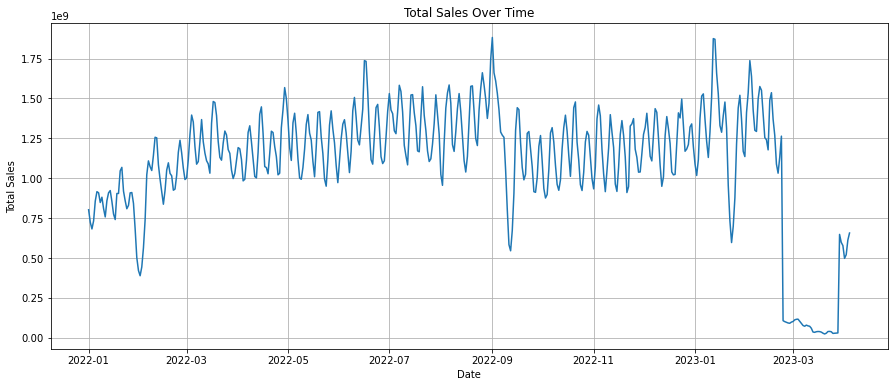

2022-01-01    802142100.0
2022-01-02    723447980.0
2022-01-03    681949150.0
2022-01-04    732568200.0
2022-01-05    856643480.0
dtype: float64

In [4]:
import matplotlib.pyplot as plt

# 각 날짜별로 열의 합계를 계산합니다.
total_sales = sales_df.iloc[:, 1:].sum(axis=0)

# 날짜 인덱스를 생성합니다.
dates = pd.to_datetime(sales_df.columns[1:], format='%Y-%m-%d')
total_sales.index = dates

# 시계열 데이터를 시각화합니다.
plt.figure(figsize=(15, 6))
plt.plot(total_sales)
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

total_sales.head()  # 처음 몇 개의 데이터 포인트를 확인합니다.


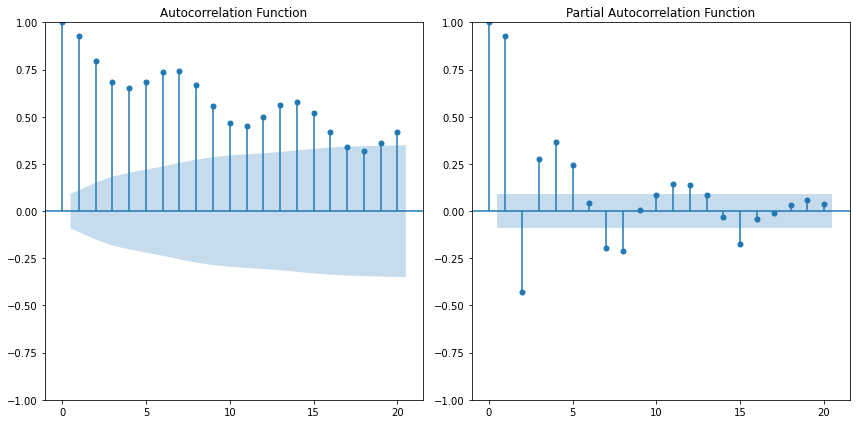

(-2.205361820177594,
 0.20430518425477162,
 14,
 444,
 {'1%': -3.4451642100030084,
  '5%': -2.8680716196949327,
  '10%': -2.5702491139112085},
 17524.11371166808)

In [5]:
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ADF 테스트를 수행하여 정상성 확인
adf_test = adfuller(total_sales)

# ACF와 PACF를 계산
lag_acf = acf(total_sales, nlags=20)
lag_pacf = pacf(total_sales, nlags=20, method='ols')

# ACF와 PACF 그래프를 그립니다.
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(total_sales, ax=plt.gca(), lags=20)
plt.title('Autocorrelation Function')

plt.subplot(122)
plot_pacf(total_sales, ax=plt.gca(), lags=20, method='ols')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

adf_test  # ADF 테스트 결과를 출력합니다.


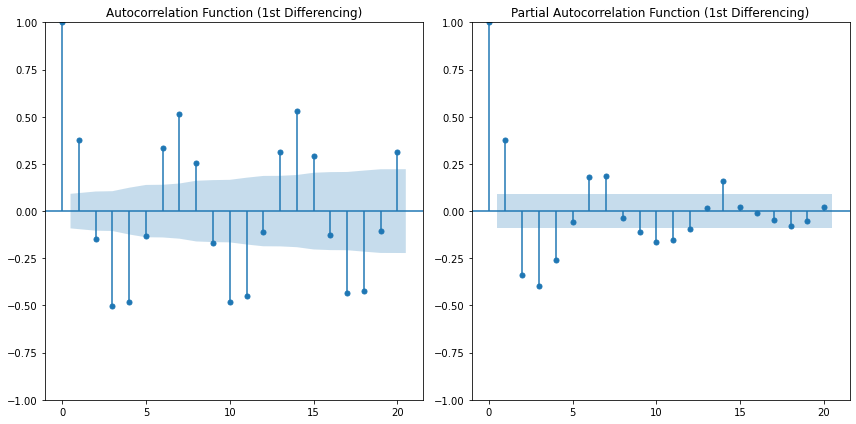

(-6.371939761961248,
 2.333445430630293e-08,
 13,
 444,
 {'1%': -3.4451642100030084,
  '5%': -2.8680716196949327,
  '10%': -2.5702491139112085},
 17486.973286191824)

In [6]:
# 1차 차분을 적용
total_sales_diff = total_sales.diff().dropna()

# 1차 차분 후의 ADF 테스트를 수행
adf_test_diff = adfuller(total_sales_diff)

# 1차 차분 후의 ACF와 PACF를 계산
lag_acf_diff = acf(total_sales_diff, nlags=20)
lag_pacf_diff = pacf(total_sales_diff, nlags=20, method='ols')

# 1차 차분 후의 ACF와 PACF 그래프를 그립니다.
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(total_sales_diff, ax=plt.gca(), lags=20)
plt.title('Autocorrelation Function (1st Differencing)')

plt.subplot(122)
plot_pacf(total_sales_diff, ax=plt.gca(), lags=20, method='ols')
plt.title('Partial Autocorrelation Function (1st Differencing)')

plt.tight_layout()
plt.show()

adf_test_diff  # 1차 차분 후의 ADF 테스트 결과를 출력합니다.


In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA 모델의 매개변수 설정
# 비계절성 매개변수는 ARIMA와 동일하게 사용합니다 (p=2, d=1, q=2)
# 계절성 주기 S를 30으로 설정하고, 계절성 매개변수 P, D, Q를 1로 설정합니다.
P, D, Q, S = 1, 1, 1, 30

# SARIMA 모델 구축 및 학습
sarima_model = SARIMAX(total_sales, order=(p, d, q), seasonal_order=(P, D, Q, S))
results_SARIMA = sarima_model.fit()

# 모델 요약을 출력합니다.
results_SARIMA.summary()


C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  459
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 30)   Log Likelihood               -8595.740
Date:                              Sat, 25 Nov 2023   AIC                          17205.479
Time:                                      02:06:32   BIC                          17233.893
Sample:                                  01-01-2022   HQIC                         17216.701
                                       - 04-04-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2431      0.011    114.616      0.000       1.222       1.264
ar.L2         -0.9957      0.010   -104.616      0.000      -1.014      -0.977
ma.L1         -1.1983      0.066    -18.060      0.000      -1.328      -1.068
ma.L2          0.9039      0.054     16.607      0.000       0.797       1.011
ar.S.L30      -0.2465      0.136     -1.810      0.070      -0.513       0.020
ma.S.L30      -0.6448      0.147     -4.378      0.000      -0.933      -0.356
sigma2      2.799e+16   1.76e-17   1.59e+33      0.000     2.8e+16     2.8e+16
===================================================================================
Ljung-Box (L1) (Q):                   3.59   Jarque-Bera (JB):             30289.14
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               2.57   Skew:                            -3.31
Prob(H) (two-sided):                  0.00   Kurtosis:                        43.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.64e+48. Standard errors may be unstable.
"""

In [10]:
# 데이터를 50%로 축소합니다.
# 시계열 데이터의 후반부 50%를 선택합니다.
reduced_data = total_sales[int(len(total_sales) / 2):]

# SARIMA 모델 구축 및 학습 (축소된 데이터 사용)
sarima_model_reduced = SARIMAX(reduced_data, order=(p, d, q), seasonal_order=(P, D, Q, S))
results_SARIMA_reduced = sarima_model_reduced.fit()

# 모델 요약을 출력합니다.
results_SARIMA_reduced.summary()


C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  230
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 30)   Log Likelihood               -4043.093
Date:                              Sat, 25 Nov 2023   AIC                           8100.187
Time:                                      02:06:40   BIC                           8123.240
Sample:                                  08-18-2022   HQIC                          8109.517
                                       - 04-04-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2408      0.021     59.241      0.000       1.200       1.282
ar.L2         -0.9927      0.014    -72.527      0.000      -1.019      -0.966
ma.L1         -1.2155      0.104    -11.677      0.000      -1.420      -1.011
ma.L2          0.9166      0.087     10.475      0.000       0.745       1.088
ar.S.L30      -0.2115      0.104     -2.037      0.042      -0.415      -0.008
ma.S.L30      -0.5054      0.143     -3.542      0.000      -0.785      -0.226
sigma2      4.265e+16        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.82   Jarque-Bera (JB):              8408.01
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):               2.46   Skew:                            -3.54
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.05e+49. Standard errors may be unstable.
"""

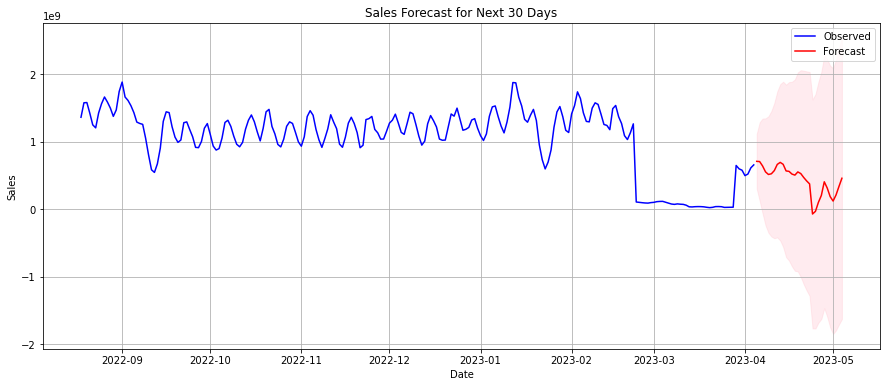

(2023-04-05    7.088239e+08
 2023-04-06    7.054236e+08
 2023-04-07    6.401873e+08
 2023-04-08    5.529467e+08
 2023-04-09    5.142043e+08
 2023-04-10    5.249695e+08
 2023-04-11    5.723080e+08
 2023-04-12    6.635311e+08
 2023-04-13    6.933322e+08
 2023-04-14    6.648795e+08
 2023-04-15    5.670013e+08
 2023-04-16    5.604998e+08
 2023-04-17    5.203665e+08
 2023-04-18    5.050956e+08
 2023-04-19    5.522070e+08
 2023-04-20    5.278747e+08
 2023-04-21    4.699113e+08
 2023-04-22    4.190480e+08
 2023-04-23    3.747105e+08
 2023-04-24   -7.053292e+07
 2023-04-25   -3.105176e+07
 2023-04-26    1.018455e+08
 2023-04-27    2.038191e+08
 2023-04-28    4.061405e+08
 2023-04-29    3.139870e+08
 2023-04-30    1.874760e+08
 2023-05-01    1.209009e+08
 2023-05-02    2.112304e+08
 2023-05-03    3.372806e+08
 2023-05-04    4.586123e+08
 Freq: D, Name: predicted_mean, dtype: float64,
 2023-04-05    3.040335e+08
 2023-04-06    1.256878e+08
 2023-04-07   -6.239928e+07
 2023-04-08   -2.384641e+08


In [11]:
import numpy as np

# 미래 기간에 대한 예측을 진행합니다. 예를 들어, 다음 30일간의 판매량을 예측합니다.
forecast_steps = 30
forecast = results_SARIMA_reduced.get_forecast(steps=forecast_steps)

# 예측값과 신뢰 구간을 추출합니다.
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# 신뢰 구간의 하한과 상한을 추출합니다.
lower_limits = confidence_intervals.iloc[:, 0]
upper_limits = confidence_intervals.iloc[:, 1]

# 예측 결과를 시각화합니다.
plt.figure(figsize=(15, 6))
plt.plot(reduced_data.index, reduced_data, label='Observed', color='blue')
plt.plot(forecast_values.index, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_values.index, lower_limits, upper_limits, color='pink', alpha=0.3)
plt.title('Sales Forecast for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

forecast_values, lower_limits, upper_limits


### 재고 관리
재고 최적화: 예측된 판매량이 높은 날짜에는 재고를 늘리고, 판매량이 낮은 날짜에는 줄여서 재고 비용을 최소화한다. 특히 2023년 4월 중순 이후 판매량이 상승하는 경향이 보이므로, 이 기간에 대비하여 추가 재고를 확보한다.

비상 재고 계획: 신뢰 구간이 넓어 예측의 불확실성이 큰 날짜에는 예상치 못한 판매량 증가에 대비하여 추가 재고를 준비한다.

### 마케팅 계획
타겟 마케팅: 예측된 판매량이 높은 기간에 맞추어 프로모션 및 광고 캠페인을 집중적으로 실행한다. 특히, 2023년 4월 중순부터 말까지는 판매 촉진 활동을 강화한다.

고객 참여 증대: 예측 판매량이 낮은 기간에는 고객 참여를 유도하는 마케팅 활동을 통해 수요를 증가시키려 한다.
기타 사업 전략

자원 배분: 판매량이 높을 것으로 예상되는 기간에는 고객 서비스 및 배송 등의 자원을 집중 배치하여 고객 만족도를 높인다.

시장 분석: 예측 결과에서 나타난 판매량 변동 추세를 시장의 수요 변화로 해석하고, 이에 따라 제품 라인업 조정 및 신제품 개발에 참고한다.